# 0. 사용할 패키지 불러오기

In [1]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.layers.core import Activation
from tensorflow.python.keras.layers.core import Flatten
from tensorflow.python.keras.layers.core import Dropout
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.python.keras.models import load_model

# 1. 데이터 불러오기

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
dfile = "temp_img.npz"
images = np.load(dfile)["train"]

d2file = "temp_img2.npz"
images2=np.load(d2file)['train']

print('images2 shape',images2.shape)
plt.imshow(images2)

emp=np.vstack((images,images2))
print("stacked shape",emp.shape)

plt.ion()
plt.figure()
images=np.reshape(images,(180,240,3))
print( emp[180:360,:240,:].shape)
print(np.array_equal(images2, emp[180:360,:240,:]))
plt.imshow(emp[180:360,:240,:])

In [ ]:
# load load model data -> success!
import numpy as np
import glob
import sys
from sklearn.model_selection import train_test_split
import cv2
x_train = np.empty((180,240, 3))
y_train = np.empty((0, 3))
print(y_train.shape)

training_data = glob.glob('/home/pirl/Documents/motion_1213ver/*.npz')
#print(training_data)

for single_npz in training_data:
    with np.load(single_npz) as data:
        #print(data.files)
        x = data['train']
        y = data['trining_label']
        temp=cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) # convert color to gray
        print(x.shape,temp.shape)
   # x = np.reshape(temp, ( -1, 3, 120, 1))
    
    x_train = np.vstack((x_train, x))
    y_train = np.vstack((y_train, y))


print(x_train.shape)
# train test split, 7:3
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state = 42)

y_train = y_train[:,:]
y_test = y_test[:,:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [2]:
# load motion model data --> fail 
import numpy as np
import glob
import sys
from sklearn.model_selection import train_test_split

x_train = np.empty((0,180,240,3))
y_train = np.empty((0, 3))
print(y_train.shape)

training_data = glob.glob('/home/pirl/Documents/motion_1213ver/*.npz')
#print(training_data)
idx=1
#total_data=[]
for single_npz in training_data:
    with np.load(single_npz) as data:
        #print(data.files)
        x = data['train']
        y = data['trining_label']
        
        #print(x.shape, y.shape)
    x = np.reshape(x, (-1,180, 240, 3))
    #x = np.transpose(x, (0,2,3,1))
    y_temp=np.empty((0,3))
    for i in range(x.shape[0]):
        y_temp=np.vstack((y_temp,y))
    
    #total_data.append(x)
    x_train = np.vstack((x_train, x))
    y_train = np.vstack((y_train, y_temp))
    #print(idx)
    idx+=1
print(x_train.shape) #, total_data.shape)
print(y_train.shape)
#train test split, 7:3
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state = 42)
#x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)
# x_train = x_train[:6369]; y_train=y_train[:6369]
# x_test = x_train[6369:]; y_test = y_train[6369:]

#x_train, y_train, x_test, y_test = x_train[:6369], y_train[:6369], x_train[6369:], y_train[6369:]

y_train = y_train[:,:]
y_test = y_test[:,:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(0, 3)


KeyboardInterrupt: 

In [28]:
x_train[0].shape

(180, 240, 3)

In [5]:
# load motion model data --> fail 
import numpy as np
import glob
import sys
from sklearn.model_selection import train_test_split

x_train2 = None# np.empty((180,240,3))
y_train2 = None#np.empty((0, 3))

training_data = glob.glob('/home/pirl/Documents/motion_1213ver/*.npz')
#print(training_data)
idx=1
#total_data=[]
for single_npz in training_data:
    with np.load(single_npz) as data:
        print(data.files)
        x = data['train']
        y = data['trining_label']
        
        print('original data shape : ',x.shape, y.shape)
    #x = np.reshape(x, (-1,180, 240, 3))
    #x = np.transpose(x, (0,2,3,1))
    if idx ==1:
        x_train2 = x
        y_train2 = y
        
    y_temp=y
    for i in range((x.shape[0]//180)-1):
        y_train2=np.vstack((y_train2,y_temp))
        
    if idx != 1:
        x_train2 = np.vstack((x_train2, x))
        
    y_train2 = np.vstack((y_train2, y_temp))
    print('stacked x',x_train2.shape)
    print('stacked y', y_train2.shape)
    idx+=1

print(x_train2.shape) #, total_data.shape)
print(y_train2.shape)
#train test split, 7:3
#x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, test_size=0.3, random_state = 42)
#x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3)
# x_train = x_train[:6369]; y_train=y_train[:6369]
# x_test = x_train[6369:]; y_test = y_train[6369:]

#x_train, y_train, x_test, y_test = x_train[:6369], y_train[:6369], x_train[6369:], y_train[6369:]



# y_train2 = y_train2[:,:]
# y_test2 = y_test2[:,:]

# print(x_train2.shape, y_train2.shape)
# print(x_test2.shape, y_test2.shape)

['train', 'trining_label']
original data shape :  (547020, 240, 3) (3,)
stacked x (547020, 240, 3)
stacked y (3040, 3)
['train', 'trining_label']
original data shape :  (548100, 240, 3) (3,)
stacked x (1095120, 240, 3)
stacked y (6085, 3)
['train', 'trining_label']
original data shape :  (542520, 240, 3) (3,)
stacked x (1637640, 240, 3)
stacked y (9099, 3)
(1637640, 240, 3)
(9099, 3)


# 데이터 확인

In [9]:

print(x_train2.shape) #, total_data.shape)
print(y_train2[:-1].shape)

(1637640, 240, 3)
(9098, 3)


In [ ]:
print(x_train2.shape) #, total_data.shape)


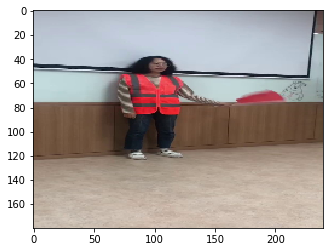

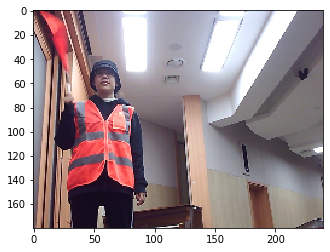

(180, 240, 3) (180, 240, 3)
(3, 240, 180, 3)


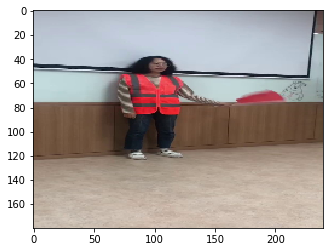

In [43]:
import cv2
img = cv2.imread('/home/pirl/Desktop/10005.jpg',cv2.IMREAD_COLOR)
img2 = cv2.imread('/home/pirl/Desktop/11072660637574.jpg',cv2.IMREAD_COLOR)
img3 = cv2.imread("/home/pirl/Desktop/10005.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)


shrink = cv2.resize(img,(240,180))
shrink2 = cv2.resize(img2,(240,180))
shrink3 = cv2.resize(img3,(240,180))
plt.imshow(shrink)
plt.show()
plt.imshow(shrink2)
plt.show()


print(shrink.shape, shrink2.shape)
shrink = np.reshape(shrink,(-1,240,180,3))
shrink2 = np.reshape(shrink2,(-1,240,180,3))
shrink3 = np.reshape(shrink3,(-1,240,180,3))

temp =np.vstack((shrink,shrink2, shrink3))
print(temp.shape)
#temp[:1,:,:,:]
#temp = np.reshape(temp[0],(240,180,3))
temp = np.reshape(temp[:1,:,:,:],(180,240,3))
plt.imshow(temp)
plt.show()
#encoding= np.eye(3)[1]
#np.savez('temp_img.npz', train=shrink, trining_label=encoding)

In [41]:
import matplotlib.pyplot as plt
plt.figure()
temp = x_train2[:1,:,:,:]#[:180,:,:]
temp = np.reshape(temp,(180,240,3))
plt.imshow(temp)#.shape

IndexError: too many indices for array

<Figure size 432x288 with 0 Axes>

In [ ]:


import numpy as np
dfile = "temp_img.npz"
images = np.load(dfile)["train"]
images.shape
plt.ion()
plt.figure()
plt.imshow(images.transpose((0,1,2)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(180, 240, 3)


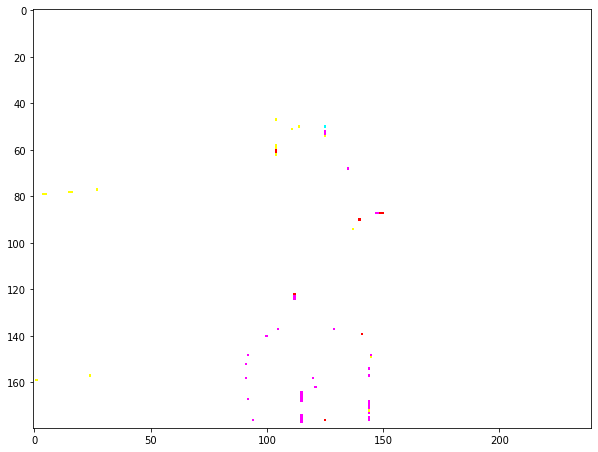

In [21]:
print(x_train[0].shape)
plt.imshow(x_train[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

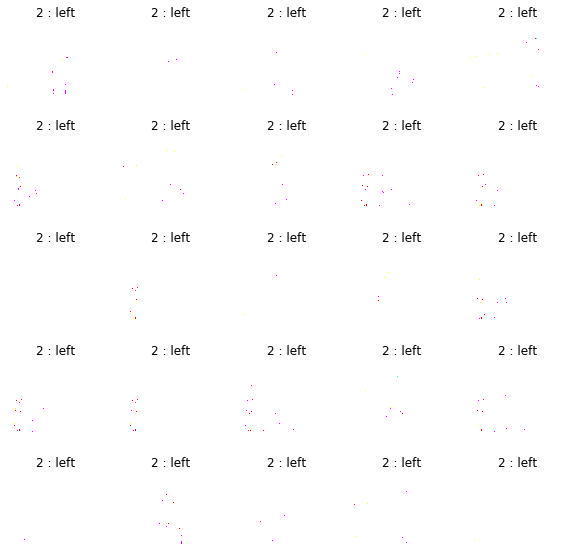

In [14]:
# 데이터 확인

from matplotlib import pyplot as plt
%matplotlib inline

plt_row = 5
plt_col = 5
plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)
#x_temp=np.reshape(x_train,(-1,180,240,3))
#print(x_temp.shape)
for i in range(plt_row*plt_col):
    
    sub_plt = axarr[int(i/plt_row), int(i%plt_col)]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i])
    #sub_plt.imshow(x_train[i].reshape(240, 180,3))
    #print(x_temp[i*180:180*(i+1),:,:].shape)
    label = np.argmax(y_train)
                      
    if label == 2 :
        direction = 'left'
    elif label == 1:
        direction = 'right'
    elif label == 0:
        direction = 'forward'

    sub_plt_title = str(label) + " : " + direction
    sub_plt.set_title(sub_plt_title)

plt.show()

# 3. 모델 생성

In [ ]:
# image size = 160 x 320
def posla_net():
    
    # model setting
    H = 240
    W = 180
    CH = 3

    inputShape = (H, W, CH)

    activation = 'relu'
    keep_prob_conv = 0.25
    keep_prob_dense = 0.5

    #init = 'glorot_normal'
    #init = 'he_normal'
    init = 'he_uniform'
    chanDim = -1
    classes = 3
    
    model = Sequential()
    
    # CONV => RELU => POOL
    model.add(Conv2D(3, (3, 3), padding="valid", input_shape=inputShape, kernel_initializer=init, activation=activation))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(9, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(18, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(32, (3, 3), padding="valid", kernel_initializer=init, activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(80, kernel_initializer=init, activation=activation))
    model.add(Dropout(keep_prob_dense))
    
    model.add(Dense(15, kernel_initializer=init, activation=activation))
    model.add(Dropout(keep_prob_dense))
    
    # softmax classifier
    model.add(Dense(classes , activation = 'softmax'))
    
    return model

In [ ]:
model = posla_net()
model.summary()

In [ ]:
from tensorflow.python.keras.utils import plot_model
plot_model(model, to_file= 'video_net_plot.png', show_shapes = True, show_layer_names = True)

# 4. 모델 파라미터 셋팅

적은 수의 이미지 데이터가 존재할 경우 데이터를 늘리는 용도로 사용

In [ ]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode="nearest")

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [ ]:
# initialize the model
# EPOCHS = 50
# INIT_LR = 1e-3
# BS = 32
# split_ratio = 0.2

In [ ]:

EPOCHS = 50
INIT_LR = 1e-4
BS = 256
split_ratio = 0.2

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])
 

# 5. 모델 훈련

In [ ]:
from tensorflow.keras.utils import to_categorical


In [ ]:
y_binary = to_categorical(y_train)

In [ ]:

hist = model.fit(x_train, y_train, 
                 epochs=EPOCHS, batch_size=BS, 
                 validation_split=split_ratio, 
                 verbose = 1
                 ,callbacks=[reduce_lr]
                )

In [ ]:
plt.subplot(1, 2, 1)
plt.title('model loss')
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.ylim((0,2))

plt.subplot(1, 2, 2)
plt.title('model accuracy')
plt.plot(hist.history['acc'], label="acc")
plt.plot(hist.history['val_acc'], label="val_acc")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.ylim((0.4, 1))


plt.show();

# 6. 모델 결과 확인

In [ ]:
#l_model = load_model('./model_data/VGG_model.h5')

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=BS)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

In [ ]:
xhat_idx = np.random.choice(x_test.shape[0], 10)
xhat = x_test[xhat_idx]

yhat_classes = model.predict_classes(xhat)

for i in range(10):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat_classes[i]))

# 7. 최종 모델 훈련

In [ ]:
x_total = np.vstack((x_train, x_test))
y_total = np.vstack((y_train, y_test))

print(x_total.shape)
print(y_total.shape)

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=10)

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.0001)

In [ ]:
EPOCHS = 50
INIT_LR = 1e-4
BS = 256
split_ratio = 0.2

print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
    metrics=["accuracy"])

In [ ]:
hist = model.fit(x_total, y_total, 
                 epochs=EPOCHS, batch_size=BS, 
                 #validation_split=split_ratio, 
                 verbose = 1
                 ,callbacks=[reduce_lr]
                )

In [ ]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=BS)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

In [ ]:
xhat_idx = np.random.choice(x_test.shape[0], 10)
xhat = x_test[xhat_idx]

yhat_classes = model.predict_classes(xhat)

for i in range(10):
    print('True : ' + str(np.argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat_classes[i]))

# 8. 모델 저장

In [ ]:
pip list

In [ ]:
from tensorflow.python.keras.models import model_from_yaml

model_yaml = model.to_yaml()
with open("motion_model_demoV2.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("motion_model_demoV2.h5")
print("Saved model to disk")

In [ ]:
model.save('motion_save_demo1.h5')

In [ ]:
model = load_model('motion_save_demo1.h5')
# summarize model.
model.summary()

In [ ]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("motion_model_demoV2-1.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("motion_model_demoV2-1.h5")
print("Saved model to disk")
 

In [ ]:
import yaml
with open(r'motion_model_demoV2-1.yaml') as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    fruits_list = yaml.load(file, Loader=yaml.FullLoader)

    print(fruits_list)

In [ ]:
def load_model(path):
    yamlPath =path[0]
    h5Path = path[1]

    yaml_file1 = open(yamlPath, 'r')
    loaded_model_yaml = yaml_file1.read()
    yaml_file1.close()
    model = model_from_yaml(loaded_model_yaml)

    # load weights into new model
    model.load_weights(h5Path)
    model._make_predict_function()

    return model

In [ ]:
load_model(['/home/pirl/A1-PONATA/Hayoung/motion_model_test/motion_model_demoV2-1.yaml',
            '/home/pirl/A1-PONATA/Hayoung/motion_model_test/motion_model_demoV2-1.h5'])

In [ ]:
from tensorflow.python.keras.models import model_from_yaml

model_yaml = model.to_yaml()
with open("motion_model_demoV2.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("motion_model_demoV2.h5")
print("Saved model to disk")

In [ ]:

load_model(['motion_model_demoV1.yaml','motion_model_demoV1.h5'])